In [1]:
USER = "Zisimopoulou"
CLONE_URL = f"https://github.com/{USER}/Food_Vision_Big.git"
get_ipython().system(f"git clone {CLONE_URL}")

import sys
sys.path.append("Food_Vision_Big")

Cloning into 'Food_Vision_Big'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 127 (delta 11), reused 0 (delta 0), pack-reused 93
Receiving objects: 100% (127/127), 44.61 MiB | 36.51 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
import os
import importlib
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from data.data_loading import load_and_preprocess_data
from models.model_definition import create_model
from training.train import train_model
from metrics.metrics import create_confusion_matrix, plot_f1_scores, visualize_predictions, calculate_metrics, find_most_wrong_predictions

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteZAM19H/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteZAM19H/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.
27018416/27018416 [==============================] - 0s 0us/step
Saving TensorBoard log files to: training_logs/efficientb1_101_classes_all_data_fine_tuning/20231118-123155
Epoch 1/100


2023-11-18 12:32:19.120865: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2368/2368 [==============================] - 973s 382ms/step - loss: 2.1388 - accuracy: 0.4997 - val_loss: 0.8388 - val_accuracy: 0.7749 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 903s 381ms/step - loss: 1.0361 - accuracy: 0.7289 - val_loss: 0.6538 - val_accuracy: 0.8165 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 904s 381ms/step - loss: 0.7434 - accuracy: 0.8004 - val_loss: 0.6052 - val_accuracy: 0.8316 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 904s 381ms/step - loss: 0.5549 - accuracy: 0.8479 - val_loss: 0.5937 - val_accuracy: 0.8334 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - ETA: 0s - loss: 0.4146 - accuracy: 0.8835
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
2368/2368 [==============================] - 850s 358ms/step - loss: 0.4146 - accuracy: 0.8835 - val_loss: 0.6126 - val_accuracy: 0.8321 - lr: 1.0000e-04
Epoch 6/100
2368/23

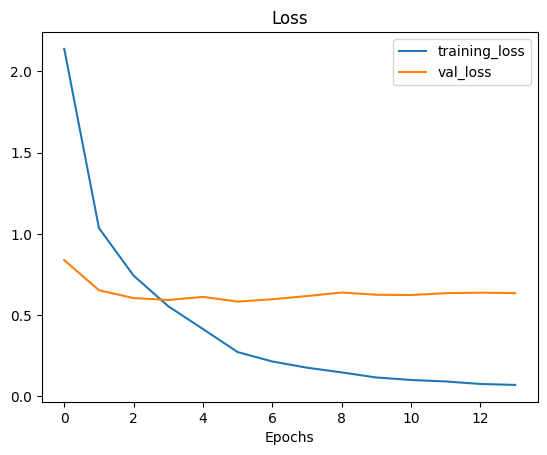

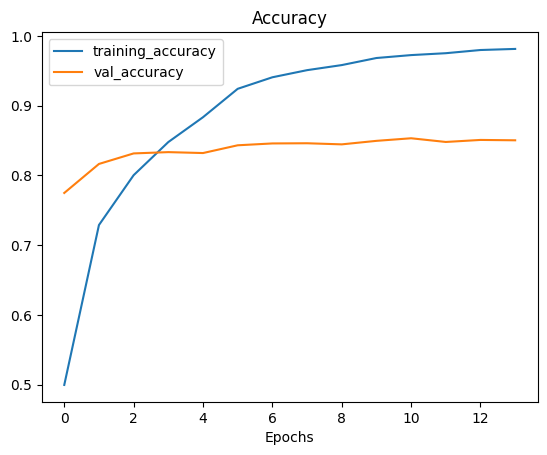

In [3]:
(train_data, test_data), ds_info = load_and_preprocess_data()

class_names = ds_info.features["label"].names

model = create_model(class_names)

train_model(model, train_data, test_data, class_names)

In [4]:
predictions, true_labels = calculate_metrics(model, test_data)

790/790 [==============================] - 62s 75ms/step


In [5]:
sklearn_acc = accuracy_score(true_labels, predictions)
sklearn_acc

0.8437623762376237

In [5]:
from metrics.metrics import create_confusion_matrix, plot_f1_scores, visualize_predictions, calculate_metrics, find_most_wrong_predictions
create_confusion_matrix(true_labels=true_labels,
                      predictions=predictions,
                      classes=class_names,
                      figsize=(20, 20),
                      text_size=10,
                      norm=False,
                      savefig=True)

ModuleNotFoundError: No module named 'metrics'

In [4]:
plot_f1_scores(true_labels,
               predictions,
               class_names,
               sklearn_acc,
               figure_size=(15, 25),
               savefig=True)


NameError: name 'plot_f1_scores' is not defined

In [ ]:
find_most_wrong_predictions(true_labels, predictions)

In [ ]:
  class_report = classification_report(true_labels, predictions)
  print(class_report)